<a href="https://colab.research.google.com/github/Gopikuppala7/MachineLearning/blob/main/Code_Gopi_Kuppala_Naveed_Ahmed_Charan_Gnanappan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/laptopPrice.csv')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [ ]:
df.columns.values

array(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice',
       'Price', 'rating', 'Number of Ratings', 'Number of Reviews'],
      dtype=object)

In [ ]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


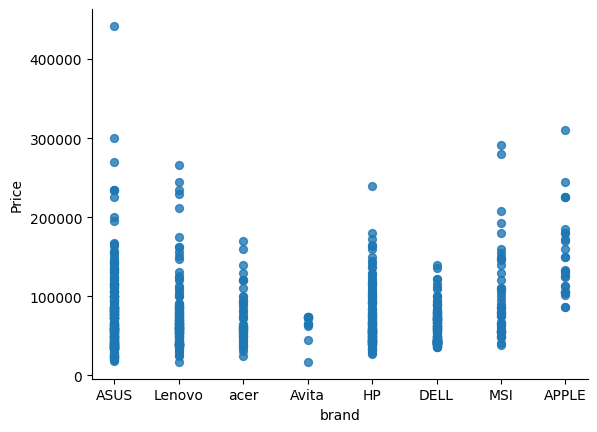

In [ ]:
# @title brand vs price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='brand', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [ ]:
df.duplicated().sum()

21

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 1

In [ ]:
df['brand'].value_counts()

ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: brand, dtype: int64

In [ ]:
df['processor_brand'].value_counts()

Intel    594
AMD      189
M1        19
Name: processor_brand, dtype: int64

In [ ]:
df['processor_name'].value_counts()

Core i5         284
Core i3         161
Core i7         104
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     23
M1               19
Pentium Quad     13
Core i9           8
Name: processor_name, dtype: int64

In [ ]:
df['processor_gnrtn'].value_counts()

11th             328
Not Available    224
10th             198
8th               35
7th                7
9th                6
12th               3
4th                1
Name: processor_gnrtn, dtype: int64

In [ ]:
df['ram_gb'].value_counts()

8 GB     404
4 GB     223
16 GB    173
32 GB      2
Name: ram_gb, dtype: int64

In [ ]:
df['ram_type'].value_counts()

DDR4       690
LPDDR4X     56
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: ram_type, dtype: int64

In [ ]:
df['ssd'].value_counts()

512 GB     389
256 GB     174
0 GB       123
1024 GB    110
128 GB       3
2048 GB      2
3072 GB      1
Name: ssd, dtype: int64

In [ ]:
df['hdd'].value_counts()

0 GB       602
1024 GB    159
512 GB      40
2048 GB      1
Name: hdd, dtype: int64

In [ ]:
df['os'].value_counts()

Windows    763
Mac         23
DOS         16
Name: os, dtype: int64

In [ ]:
df['os_bit'].value_counts()

64-bit    693
32-bit    109
Name: os_bit, dtype: int64

In [ ]:
df['graphic_card_gb'].value_counts()

0 GB    557
4 GB    127
2 GB     67
6 GB     37
8 GB     14
Name: graphic_card_gb, dtype: int64

In [ ]:
df['weight'].value_counts()

Casual        509
ThinNlight    254
Gaming         39
Name: weight, dtype: int64

In [ ]:
df['warranty'].value_counts()

1 year         498
No warranty    268
2 years         23
3 years         13
Name: warranty, dtype: int64

In [ ]:
df['Touchscreen'].value_counts()

No     706
Yes     96
Name: Touchscreen, dtype: int64

In [ ]:
df['msoffice'].value_counts()

No     522
Yes    280
Name: msoffice, dtype: int64

In [ ]:
df['rating'].value_counts()

4 stars    437
3 stars    338
5 stars     16
2 stars      9
1 star       2
Name: rating, dtype: int64

In [ ]:
df['brand'] = df['brand'].map({'ASUS':1, 'DELL':2, 'Lenovo':3, 'HP':4, 'acer':5, 'MSI':6, 'APPLE':7, 'Avita':8})
df['processor_brand'] = df['processor_brand'].map({'Intel':1, 'AMD':2, 'M1':3})
df['processor_name'] = df['processor_name'].map({'Core i5':1, 'Core i3':2, 'Core i7':3, 'Ryzen 5':4, 'Ryzen 7':5, 'Ryzen 3':6, 'Ryzen 9':7, 'Celeron Dual':8, 'M1':9, 'Pentium Quad':10, 'Core i9':11})
df['processor_gnrtn'] = df['processor_gnrtn'].map({'11th':1, 'Not Available':2, '10th':3, '8th':4, '7th':5, '9th':6, '12th':7, '4th':8})
df['ram_gb'] = df['ram_gb'].map({'8 GB':1, '4 GB':2, '16 GB':3, '32 GB':4})
df['ram_type'] = df['ram_type'].map({'DDR4':1, 'LPDDR4X':2, 'LPDDR4':3, 'LPDDR3':4, 'DDR5':5, 'DDR3':6})
df['ssd'] = df['ssd'].map({'512 GB':1, '256 GB':2, '0 GB':3, '1024 GB':4, '128 GB':5, '2048 GB':6, '3072 GB':7})
df['hdd'] = df['hdd'].map({'0 GB':1, '1024 GB':2, '512 GB':3, '2048 GB':4})
df['os'] = df['os'].map({'Windows':1, 'Mac':2, 'DOS':3})
df['os_bit'] = df['os_bit'].map({'64-bit':1, '32-bit':2})
df['graphic_card_gb'] = df['graphic_card_gb'].map({'0 GB':1, '4 GB':2, '2 GB':3, '6 GB':4, '8 GB':5})
df['weight'] = df['weight'].map({'Casual':1, 'ThinNlight':2, 'Gaming':3})
df['warranty'] = df['warranty'].map({'1 year':1, 'No warranty':2, '2 years':3, '3 years':4})
df['Touchscreen'] = df['Touchscreen'].map({'No':1, 'Yes':2})
df['msoffice'] = df['msoffice'].map({'No':1, 'Yes':2})
df['rating'] = df['rating'].map({'4 stars':1, '3 stars':2, '5 stars':3, '2 stars':4, '1 star':5})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   brand              802 non-null    int64
 1   processor_brand    802 non-null    int64
 2   processor_name     802 non-null    int64
 3   processor_gnrtn    802 non-null    int64
 4   ram_gb             802 non-null    int64
 5   ram_type           802 non-null    int64
 6   ssd                802 non-null    int64
 7   hdd                802 non-null    int64
 8   os                 802 non-null    int64
 9   os_bit             802 non-null    int64
 10  graphic_card_gb    802 non-null    int64
 11  weight             802 non-null    int64
 12  warranty           802 non-null    int64
 13  Touchscreen        802 non-null    int64
 14  msoffice           802 non-null    int64
 15  Price              802 non-null    int64
 16  rating             802 non-null    int64
 17  Number of Rating

In [ ]:
df.describe()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.00000,802.000000
mean,2.844140,1.283042,3.038653,2.007481,1.716958,1.273067,1.970075,1.301746,1.068579,1.135910,1.533666,1.413965,1.440150,1.119701,1.349127,76625.543641,1.504988,299.84414,36.089776
std,1.734398,0.500623,2.411945,1.080964,0.806303,0.815883,1.136876,0.564202,0.322344,0.342907,0.950452,0.583335,0.633666,0.324814,0.476992,45232.984422,0.622588,1001.78442,118.313553
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16990.000000,1.000000,0.00000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45990.000000,1.000000,0.00000,0.000000
50%,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63990.000000,1.000000,17.00000,2.000000
75%,4.000000,2.000000,4.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,89525.000000,2.000000,140.25000,18.000000
max,8.000000,3.000000,11.000000,8.000000,4.000000,6.000000,7.000000,4.000000,3.000000,2.000000,5.000000,3.000000,4.000000,2.000000,2.000000,441990.000000,5.000000,15279.00000,1947.000000


In [ ]:
X = df.drop(columns = 'Price') # Set of independent variables
y = df['Price'] # Dependent variable

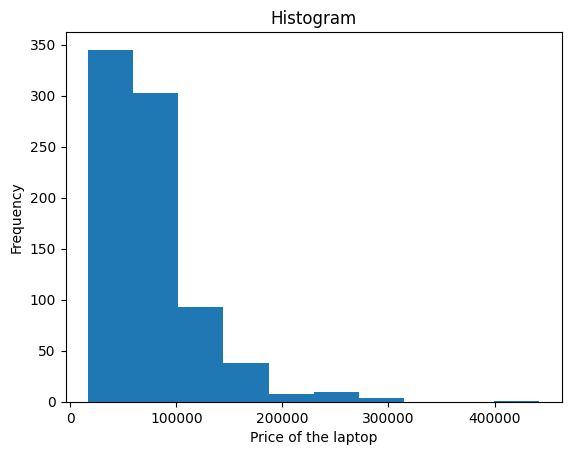

In [ ]:
from matplotlib import pyplot as plt

plt.hist(df['Price'])
plt.xlabel("Price of the laptop")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(802, 18)
(601, 18)
(201, 18)
(601,)
(201,)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

def LinReg(X_train, X_test, y_train, y_test):
  LR = LinearRegression()
  LR.fit(X_train, y_train)
  y_pred = LR.predict(X_test)

  print("The r2_score is:", round(r2_score(y_test, y_pred),2))
  print("The mean squared error is:", round(mean_squared_error(y_test, y_pred),2))
  print("The mean absolute error is:", round(mean_absolute_error(y_test, y_pred),2))
  print("The root mean squared error is:", round(sqrt(mean_squared_error(y_test, y_pred)),2))

In [ ]:
LinReg(X_train, X_test, y_train, y_test)

The r2_score is: 0.5
The mean squared error is: 817618816.38
The mean absolute error is: 20386.56
The root mean squared error is: 28594.03


Feature selection (Reducing the dimensinality of the data)

In [ ]:
cor = df.corr()
cor['Price']


brand                0.163436
processor_brand      0.161412
processor_name       0.222712
processor_gnrtn      0.172149
ram_gb               0.421618
ram_type             0.263730
ssd                  0.336381
hdd                 -0.186124
os                   0.282251
os_bit               0.019731
graphic_card_gb      0.461184
weight              -0.209566
warranty             0.004077
Touchscreen          0.191227
msoffice            -0.103783
Price                1.000000
rating               0.134822
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [ ]:
cor_1 = cor[abs(cor['Price'])>0.15]
cor_1

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
brand,1.000000,0.171649,0.050684,0.163102,0.030013,-0.030761,-0.082778,-0.011842,0.309440,-0.042006,0.050521,-0.050906,0.064770,-0.064349,-0.060904,0.163436,-0.138597,0.049228,0.039589
processor_brand,0.171649,1.000000,0.613351,0.092976,0.136860,-0.094710,0.025868,-0.161313,0.189020,-0.071645,-0.058096,-0.076823,-0.145274,-0.039709,-0.043142,0.161412,-0.094659,0.057766,0.048534
processor_name,0.050684,0.613351,1.000000,0.087037,0.364483,0.008587,0.323677,0.012519,0.080086,0.013263,0.029656,-0.148922,-0.037285,-0.034597,-0.157154,0.222712,0.049339,0.099198,0.107588
processor_gnrtn,0.163102,0.092976,0.087037,1.000000,0.002433,0.272299,0.155612,0.168243,0.199169,0.041038,0.111547,-0.012837,0.100899,-0.148336,-0.160034,0.172149,0.020350,0.078408,0.082100
ram_gb,0.030013,0.136860,0.364483,0.002433,1.000000,0.036031,0.283564,-0.113900,-0.045309,-0.018731,0.200607,-0.148721,-0.005097,0.029422,-0.044627,0.421618,0.148303,-0.089217,-0.078189
ram_type,-0.030761,-0.094710,0.008587,0.272299,0.036031,1.000000,0.133993,0.138094,0.242009,0.161696,0.029184,-0.085667,0.052177,0.055521,-0.084879,0.263730,0.128805,0.012652,0.013442
ssd,-0.082778,0.025868,0.323677,0.155612,0.283564,0.133993,1.000000,0.323564,0.107808,0.141745,0.258583,-0.182725,0.047767,-0.047761,-0.183304,0.336381,0.155427,0.024621,0.029944
hdd,-0.011842,-0.161313,0.012519,0.168243,-0.113900,0.138094,0.323564,1.000000,0.297950,0.342713,0.025267,-0.084133,0.169305,-0.170088,-0.164632,-0.186124,0.081009,0.144279,0.156638
os,0.309440,0.189020,0.080086,0.199169,-0.045309,0.242009,0.107808,0.297950,1.000000,0.254411,0.100440,-0.111331,0.023176,-0.078501,-0.155914,0.282251,-0.060804,0.075925,0.070448
graphic_card_gb,0.050521,-0.058096,0.029656,0.111547,0.200607,0.029184,0.258583,0.025267,0.100440,0.114267,1.000000,-0.180538,0.057245,-0.085860,-0.053496,0.461184,-0.010833,-0.056708,-0.050275


In [ ]:
cor_2 = cor[abs(cor['Price'])>0.2]


In [ ]:
cor_2

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
processor_name,0.050684,0.613351,1.000000,0.087037,0.364483,0.008587,0.323677,0.012519,0.080086,0.013263,0.029656,-0.148922,-0.037285,-0.034597,-0.157154,0.222712,0.049339,0.099198,0.107588
ram_gb,0.030013,0.136860,0.364483,0.002433,1.000000,0.036031,0.283564,-0.113900,-0.045309,-0.018731,0.200607,-0.148721,-0.005097,0.029422,-0.044627,0.421618,0.148303,-0.089217,-0.078189
ram_type,-0.030761,-0.094710,0.008587,0.272299,0.036031,1.000000,0.133993,0.138094,0.242009,0.161696,0.029184,-0.085667,0.052177,0.055521,-0.084879,0.263730,0.128805,0.012652,0.013442
ssd,-0.082778,0.025868,0.323677,0.155612,0.283564,0.133993,1.000000,0.323564,0.107808,0.141745,0.258583,-0.182725,0.047767,-0.047761,-0.183304,0.336381,0.155427,0.024621,0.029944
os,0.309440,0.189020,0.080086,0.199169,-0.045309,0.242009,0.107808,0.297950,1.000000,0.254411,0.100440,-0.111331,0.023176,-0.078501,-0.155914,0.282251,-0.060804,0.075925,0.070448
graphic_card_gb,0.050521,-0.058096,0.029656,0.111547,0.200607,0.029184,0.258583,0.025267,0.100440,0.114267,1.000000,-0.180538,0.057245,-0.085860,-0.053496,0.461184,-0.010833,-0.056708,-0.050275
weight,-0.050906,-0.076823,-0.148922,-0.012837,-0.148721,-0.085667,-0.182725,-0.084133,-0.111331,-0.194242,-0.180538,1.000000,-0.013948,-0.182781,0.135008,-0.209566,-0.112256,0.040054,0.029923
Price,0.163436,0.161412,0.222712,0.172149,0.421618,0.263730,0.336381,-0.186124,0.282251,0.019731,0.461184,-0.209566,0.004077,0.191227,-0.103783,1.000000,0.134822,-0.152553,-0.156791


In [ ]:
lsFeat_1 = list(cor_1['Price'].index)
lsFeat_2 = list(cor_2['Price'].index)
df_1 = df[lsFeat_1]
df_2 = df[lsFeat_2]
df_1



,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,Touchscreen,Price,Number of Ratings,Number of Reviews
0,1,1,2,3,2,1,3,2,1,1,1,1,34649,3,0
1,3,1,2,3,2,1,3,2,1,1,1,1,38999,65,5
2,3,1,2,3,2,1,3,2,1,1,1,1,39999,8,1
3,1,1,1,3,1,1,1,1,1,3,1,1,69990,0,0
4,1,1,8,2,2,1,3,3,1,1,1,1,26990,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,2,7,2,2,1,4,1,1,1,1,1,135990,0,0
819,1,2,7,2,2,1,4,1,1,1,1,1,144990,0,0
820,1,2,7,2,2,1,4,1,1,2,1,1,149990,0,0
821,1,2,7,2,2,1,4,1,1,2,1,1,142990,0,0


In [ ]:
df_2

,processor_name,ram_gb,ram_type,ssd,os,graphic_card_gb,weight,Price
0,2,2,1,3,1,1,1,34649
1,2,2,1,3,1,1,1,38999
2,2,2,1,3,1,1,1,39999
3,1,1,1,1,1,3,1,69990
4,8,2,1,3,1,1,1,26990
...,...,...,...,...,...,...,...,...
818,7,2,1,4,1,1,1,135990
819,7,2,1,4,1,1,1,144990
820,7,2,1,4,1,2,1,149990
821,7,2,1,4,1,2,1,142990


In [ ]:
X1 = df_1.drop(columns='Price')
y1 = df['Price']

X2 = df_2.drop(columns='Price')
y2 = df['Price']

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.2)

In [ ]:
print(X1.shape)
print(y1.shape)
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

(802, 14)
(802,)
(641, 14)
(641,)
(161, 14)
(161,)


In [ ]:
print(X2.shape)
print(y2.shape)
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(802, 7)
(802,)
(641, 7)
(641,)
(161, 7)
(161,)


In [ ]:
corr = df.corr()
figure = ff.create_annotated_heatmap(
    x=list(corr.columns),
    y=list(corr.index),
    z=corr.values,
    annotation_text=corr.round(2).values,
    showscale=True)
figure.show()

In [ ]:
corr=df_1.corr()
figure = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True)
figure.show()

In [ ]:
corr=df_2.corr()
figure = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True)
figure.show()

In [ ]:
LinReg(X_train_1, X_test_1, y_train_1, y_test_1)

The r2_score is: 0.61
The mean squared error is: 791654663.19
The mean absolute error is: 20104.78
The root mean squared error is: 28136.36


In [ ]:
LinReg(X_train_2, X_test_2, y_train_2, y_test_2)

The r2_score is: 0.31
The mean squared error is: 920863569.35
The mean absolute error is: 21872.87
The root mean squared error is: 30345.73


Optimization

In [ ]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

sgdr = SGDRegressor(random_state = 1, penalty = None)
grid_param = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}

gd_sr = GridSearchCV(estimator=sgdr, param_grid=grid_param, scoring='r2', cv=5)

gd_sr.fit(X_scaled, y)

results = pd.DataFrame.from_dict(gd_sr.cv_results_)
print("Cross-validation results:\n", results)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_
print("Best result: ", best_result)

best_model = gd_sr.best_estimator_
print("Intercept: ", best_model.intercept_)

print(pd.DataFrame(zip(X.columns, best_model.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number o

Cross-validation results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0        0.829471      0.165738         0.001273        0.000159     0.0001   
1        1.502341      0.051952         0.001483        0.000694     0.0001   
2        2.309805      0.468552         0.000949        0.000068     0.0001   
3        2.874227      0.579037         0.001916        0.001801     0.0001   
4        0.032418      0.011756         0.000877        0.000065      0.001   
5        0.030937      0.011746         0.000815        0.000034      0.001   
6        0.030533      0.012361         0.000805        0.000027      0.001   
7        0.035749      0.019138         0.001001        0.000191      0.001   
8        0.004128      0.000850         0.000957        0.000084       0.01   
9        0.004750      0.001286         0.000891        0.000092       0.01   
10       0.004991      0.001462         0.000880        0.000090       0.01   
11       0.004025      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Support vector regression

In [ ]:
from sklearn import svm

def supp(X_train, X_test, y_train, y_test):
  sv_reg=svm.SVR()
  sv_reg.fit(X_train, y_train)
  y_pred = sv_reg.predict(X_test)

  print("The r2_score is:", round(r2_score(y_test, y_pred),2))
  print("The mean squared error is:", round(mean_squared_error(y_test, y_pred),2))
  print("The mean absolute error is:", round(mean_absolute_error(y_test, y_pred),2))
  print("The root mean squared error is:", round(sqrt(mean_squared_error(y_test, y_pred)),2))

In [ ]:
supp(X_train, X_test, y_train, y_test)

The r2_score is: -0.03
The mean squared error is: 1678881730.65
The mean absolute error is: 27869.56
The root mean squared error is: 40974.16


In [ ]:
supp(X_train_1, X_test_1, y_train_1, y_test_1)

The r2_score is: -0.17
The mean squared error is: 2384589324.8
The mean absolute error is: 32230.7
The root mean squared error is: 48832.26


In [ ]:
supp(X_train_2, X_test_2, y_train_2, y_test_2)

The r2_score is: -0.06
The mean squared error is: 1418091978.92
The mean absolute error is: 26602.38
The root mean squared error is: 37657.56


Bayesian Ridge regression

In [ ]:
from sklearn import linear_model

def Bayrid(X_train, X_test, y_train, y_test):
  BR=linear_model.Ridge()
  BR.fit(X_train, y_train)
  y_pred = BR.predict(X_test)

  print("The r2_score is:", round(r2_score(y_test, y_pred),2))
  print("The mean squared error is:", round(mean_squared_error(y_test, y_pred),2))
  print("The mean absolute error is:", round(mean_absolute_error(y_test, y_pred),2))
  print("The root mean squared error is:", round(sqrt(mean_squared_error(y_test, y_pred)),2))


In [ ]:
Bayrid(X_train, X_test, y_train, y_test)

The r2_score is: 0.5
The mean squared error is: 814546741.2
The mean absolute error is: 20354.24
The root mean squared error is: 28540.27


In [ ]:
Bayrid(X_train_1, X_test_1, y_train_1, y_test_1)

The r2_score is: 0.61
The mean squared error is: 793179250.43
The mean absolute error is: 20124.84
The root mean squared error is: 28163.44


In [ ]:
Bayrid(X_train_2, X_test_2, y_train_2, y_test_2)

The r2_score is: 0.31
The mean squared error is: 920803803.57
The mean absolute error is: 21876.42
The root mean squared error is: 30344.75


Decision tree Regression

In [ ]:
from sklearn import tree

def DTR(X_train, X_test, y_train, y_test):
  dtr=tree.DecisionTreeRegressor()
  dtr.fit(X_train, y_train)
  y_pred = dtr.predict(X_test)

  print("The r2_score is:", round(r2_score(y_test, y_pred),2))
  print("The mean squared error is:", round(mean_squared_error(y_test, y_pred),2))
  print("The mean absolute error is:", round(mean_absolute_error(y_test, y_pred),2))
  print("The root mean squared error is:", round(sqrt(mean_squared_error(y_test, y_pred)),2))

In [ ]:
DTR(X_train, X_test, y_train, y_test)

The r2_score is: 0.63
The mean squared error is: 605229657.59
The mean absolute error is: 13359.86
The root mean squared error is: 24601.42


In [ ]:
DTR(X_train_1, X_test_1, y_train_1, y_test_1)

The r2_score is: 0.61
The mean squared error is: 792607852.25
The mean absolute error is: 16347.72
The root mean squared error is: 28153.29


In [ ]:
DTR(X_train_2, X_test_2, y_train_2, y_test_2)

The r2_score is: 0.5
The mean squared error is: 663112011.4
The mean absolute error is: 15297.45
The root mean squared error is: 25750.96


Model Comparison

In [ ]:
print("Linear Regression:\n")
LinReg(X_train, X_test, y_train, y_test)
print("\nSupport vector Regression:\n")
supp(X_train, X_test, y_train, y_test)
print("\nBayesian Ridge Regression:\n")
Bayrid(X_train, X_test, y_train, y_test)
print("\nDecesion Tree Regression:\n")
DTR(X_train, X_test, y_train, y_test)


Linear Regression:

The r2_score is: 0.5
The mean squared error is: 817618816.38
The mean absolute error is: 20386.56
The root mean squared error is: 28594.03

Support vector Regression:

The r2_score is: -0.03
The mean squared error is: 1678881730.65
The mean absolute error is: 27869.56
The root mean squared error is: 40974.16

Bayesian Ridge Regression:

The r2_score is: 0.5
The mean squared error is: 814546741.2
The mean absolute error is: 20354.24
The root mean squared error is: 28540.27

Decesion Tree Regression:

The r2_score is: 0.66
The mean squared error is: 558267806.97
The mean absolute error is: 12951.46
The root mean squared error is: 23627.69


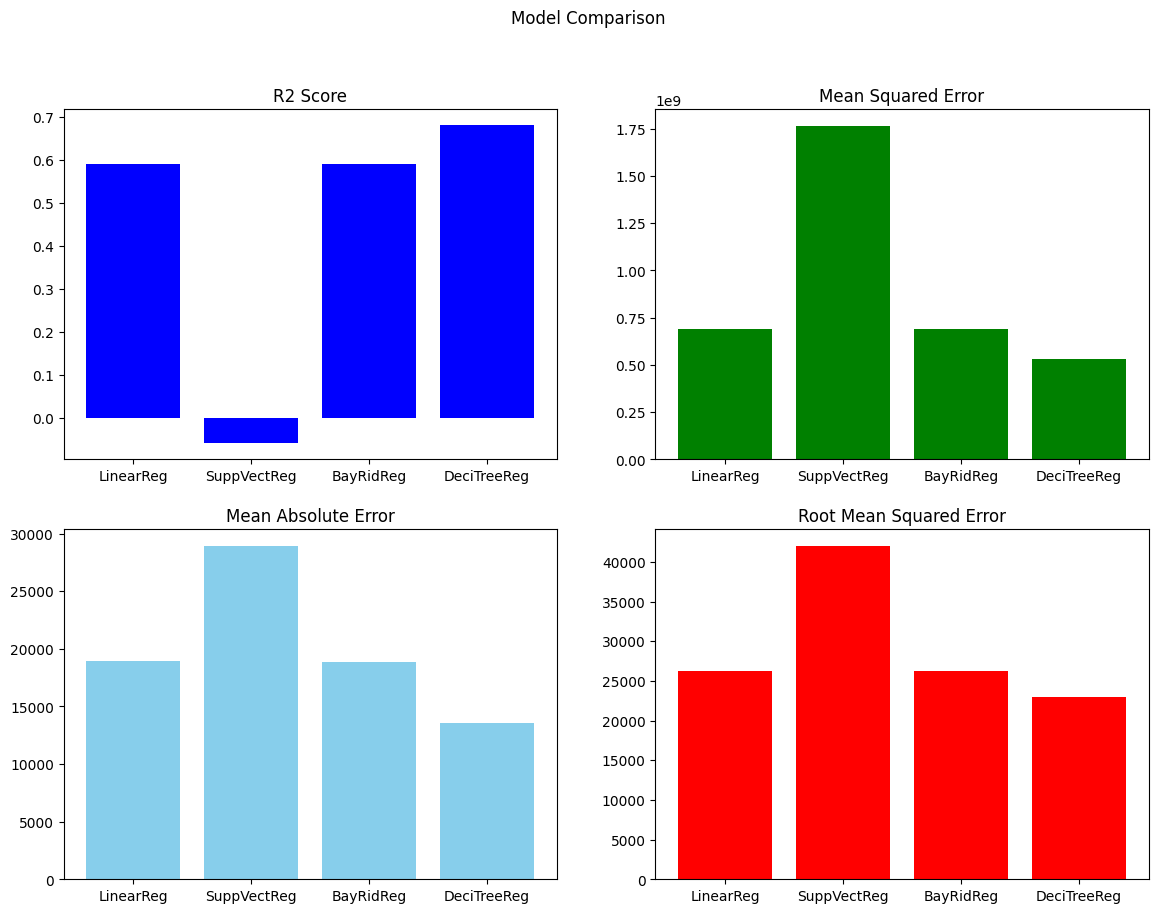

In [ ]:
models = ['LinearReg', 'SuppVectReg', 'BayRidReg', 'DeciTreeReg']
r2_scores = [0.59, -0.06, 0.59, 0.68]
mean_squared_errors = [688598227.98, 1764791178.35, 688565589.85, 528304837.4]
mean_absolute_errors = [18911.74, 28923.97, 18890.31, 13598.3]
root_mean_squared_errors = [26241.16, 42009.42, 26240.53, 22984.88]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Model Comparison')

axes[0, 0].bar(models, r2_scores, color='blue')
axes[0, 0].set_title('R2 Score')

axes[0, 1].bar(models, mean_squared_errors, color='green')
axes[0, 1].set_title('Mean Squared Error')

axes[1, 0].bar(models, mean_absolute_errors, color='skyblue')
axes[1, 0].set_title('Mean Absolute Error')

axes[1, 1].bar(models, root_mean_squared_errors, color='red')
axes[1, 1].set_title('Root Mean Squared Error')

plt.show()